In [2]:
# initializing imports


import csv

from Patient import *

import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt

import numpy as np

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import roc_curve, auc

from sklearn.preprocessing import LabelEncoder

In [ ]:
# Ready data from csv file


data = pd.read_csv('./Data.csv')

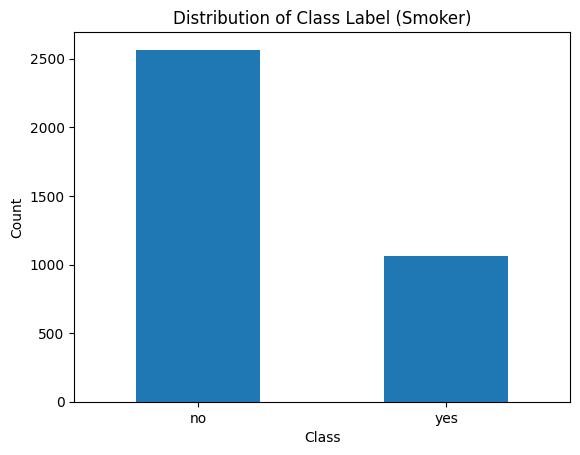

Number of non Smokers resuts: 2566
Number of Smoker resuts: 1064
Data is skewed to the left, since negative results almost more than double positive results


In [71]:
# Smoker distibution

data['Smoker'].value_counts().plot(kind='bar')

plt.xlabel('Class')

plt.ylabel('Count')
plt.xticks(rotation=0)

plt.title('Distribution of Class Label (Smoker)')

plt.show()

print('Number of non Smokers resuts: ' +
      str(data.loc[data['Smoker'] == 'no'].shape[0]))
print('Number of Smoker resuts: ' +
      str(data.loc[data['Smoker'] == 'yes'].shape[0]))
print('Data is skewed to the left, since negative results almost more than double positive results')

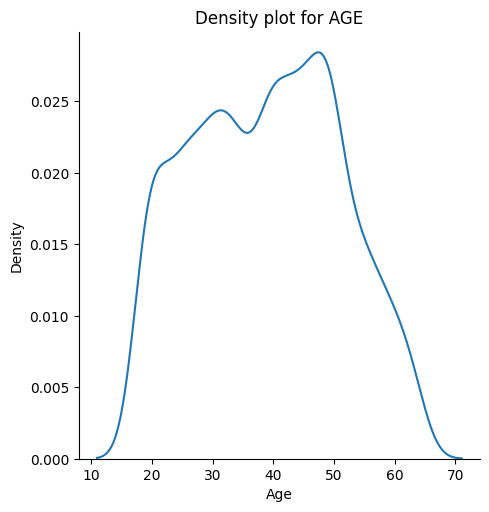

In [63]:
# Age distobution

sb.displot(data['Age'], kind='kde')
plt.title('Density plot for AGE')

plt.show()

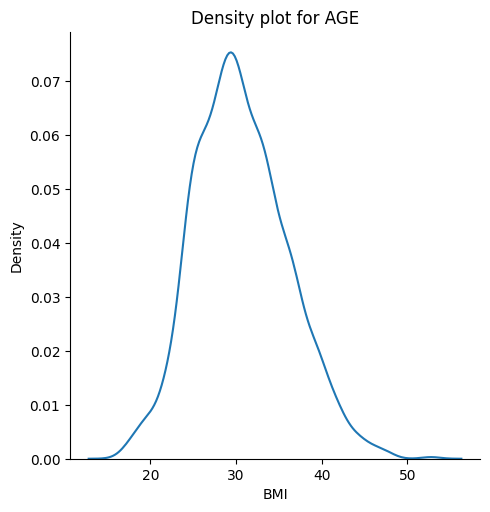

In [30]:
# BMI distribution

sb.displot(data['BMI'], kind='kde')
plt.title('Density plot for AGE')

plt.show()

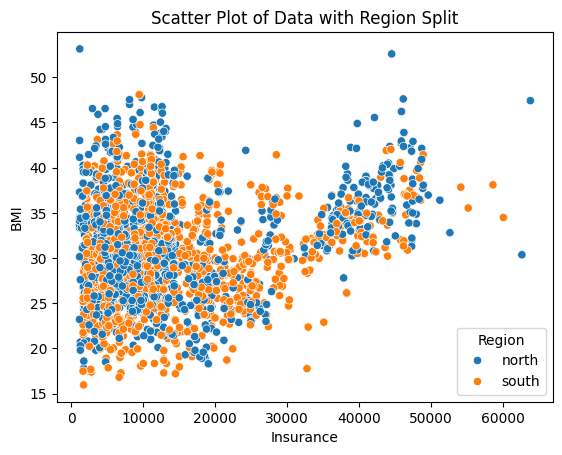

In [72]:
# Scatter plot with different colors for each region


sb.scatterplot(x='Insurance Charges', y='BMI', hue='Region', data=data)

plt.title('Scatter Plot of Data with Region Split')


plt.xlabel('Insurance')

plt.ylabel('BMI')

plt.legend(title='Region')

plt.show()

In [20]:
# Prepare data and code them

datae = pd.read_csv('./Data.csv')
datae.loc[datae['Region'] == 'north', 'Region'] = 1
datae.loc[datae['Region'] == 'south', 'Region'] = 0
datae.loc[datae['Gender'] == 'male', 'Gender'] = 1
datae.loc[datae['Gender'] == 'female', 'Gender'] = 0
datae.loc[datae['Smoker'] == 'no', 'Smoker'] = 0
datae.loc[datae['Smoker'] == 'yes', 'Smoker'] = 1

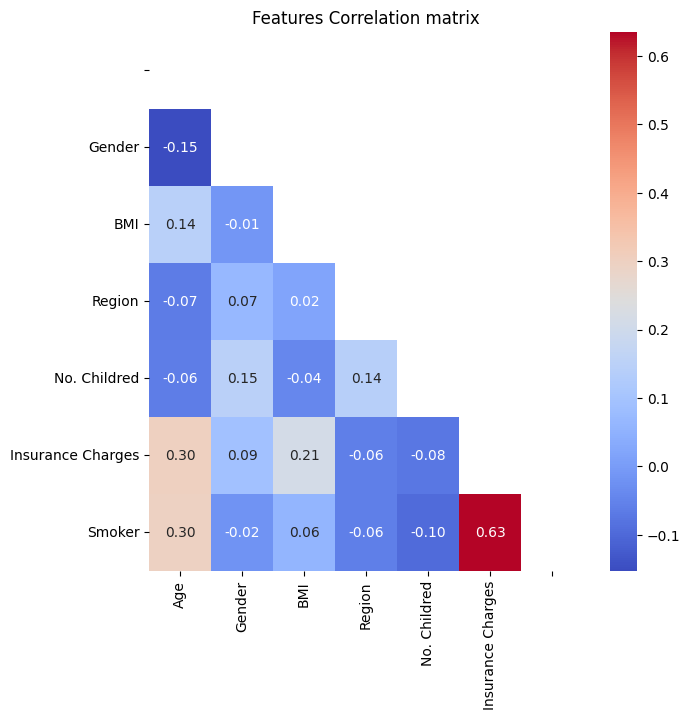

In [21]:
# Correlation matrix to find relationships between attributes

corr_matrix = datae.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(7, 7))

ax = sb.heatmap(corr_matrix, annot=True, fmt=".2f", mask=mask, cmap="coolwarm")
plt.title('Features Correlation matrix')
xticklabels = [label.get_text() for label in ax.get_xticklabels()]
yticklabels = [label.get_text() for label in ax.get_yticklabels()]
npg_index = yticklabels.index('Age')
yticklabels[npg_index] = ''
ax.set_yticklabels(yticklabels)
npg_index = xticklabels.index('Smoker')
xticklabels[npg_index] = ''
ax.set_xticklabels(xticklabels)

plt.show()

In [22]:
# Split the data

datae = datae.sample(frac=1)

train_size = int(0.8 * len(datae))

train_set = datae[:train_size]

test_set = datae[train_size:]

In [26]:
# KNN using 3 different K values

yTrain = train_set[['Smoker']]
xTrain = train_set[['Insurance Charges', 'Age']]
xTest = test_set[['Insurance Charges', 'Age']]
yTest = test_set[['Smoker']]

yTrain = yTrain.astype('int')
yTest = yTest.astype('int')

scaler = StandardScaler()
scaler.fit(xTrain)

xTrainScaled = scaler.transform(xTrain)
xTestScaled = scaler.transform(xTest)
knn1 = KNeighborsClassifier(n_neighbors=20)
knn2 = KNeighborsClassifier(n_neighbors=30)
knn3 = KNeighborsClassifier(n_neighbors=40)

knn1.fit(xTrainScaled, yTrain.values.ravel())
yClass1 = knn1.predict(xTestScaled)

knn2.fit(xTrainScaled, yTrain.values.ravel())
yClass2 = knn2.predict(xTestScaled)

knn3.fit(xTrainScaled, yTrain.values.ravel())
yClass3 = knn3.predict(xTestScaled)

acc1 = accuracy_score(yTest, yClass1)
acc2 = accuracy_score(yTest, yClass2)
acc3 = accuracy_score(yTest, yClass3)

print('Accuracy model 1 (k=20):', acc1)
print('Accuracy model 2 (k=30):', acc2)
print('Accuracy model 3 (k=40):', acc3)

Accuracy model 1 (k=10): 0.8829201101928374
Accuracy model 2 (k=20): 0.8884297520661157
Accuracy model 3 (k=30): 0.8939393939393939
